In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# ... (other imports)

# Function to load and preprocess images and labels
def load_data(image_folder, label_file, target_size=(80, 60)):
    labels_df = pd.read_csv(label_file)
    images = []
    labels = []

    # Create a dictionary to map letters to numerical labels
    unique_letters = labels_df['label'].unique()  # Get unique letters from the 'label' column
    letter_to_label_dict = {letter: i for i, letter in enumerate(unique_letters)}

    for index, row in labels_df.iterrows():
        img_path = os.path.join(image_folder, row['image'])  # Use 'image' column
        img = Image.open(img_path).convert("L")
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0
        images.append(img_array)

        # Convert letter label to numerical label using the dictionary
        labels.append(letter_to_label_dict[row['label']])

    return np.array(images), np.array(labels), letter_to_label_dict # Return the dictionary

# Load the dataset
image_folder = "./"
label_file = "./data/labels.csv"  # Updated label file name
X, y, letter_to_label_dict = load_data(image_folder, label_file) # Get the dictionary from the function call

# Create the label to letter dictionary
label_to_letter_dict = {i: letter for letter, i in letter_to_label_dict.items()}

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Build the CNN model
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(60, 80, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(len(np.unique(y)), activation="softmax")
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Reshape input data for CNN
X_train = X_train.reshape(-1, 60, 80, 1)
X_test = X_test.reshape(-1, 60, 80, 1)

# Train the CNN model
model.fit(X_train, y_train, epochs=50)  # Adjust epochs as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

# Make predictions and show some examples
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(pred) for pred in y_pred]

# ...

# Convert y_pred_labels and y_test to letters
y_pred_letters = [label_to_letter_dict.get(label, '') for label in y_pred_labels]  # Get letter or empty string
y_test_letters = [label_to_letter_dict.get(label, '') for label in y_test]  # Get letter or empty string

Epoch 1/50


C:\Users\Nathan Cohn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.0199 - loss: 6.5008
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.0257 - loss: 4.9978
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.0406 - loss: 4.5104
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.0634 - loss: 4.2494
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.1087 - loss: 3.8999
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.1415 - loss: 3.6199
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.2148 - loss: 3.3173
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.2784 - loss: 3.1307
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.3289 - loss: 2.9697
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.3622 - loss: 2.8105
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.4327 - loss: 2.6419
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.4378 - 

In [ ]:
# prompt: save the weights of the model

# Save model weights and biases
model.save_weights('./weights/cnn_weights.weights.h5')

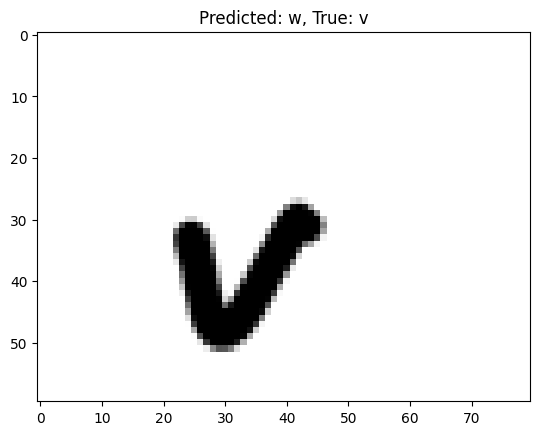

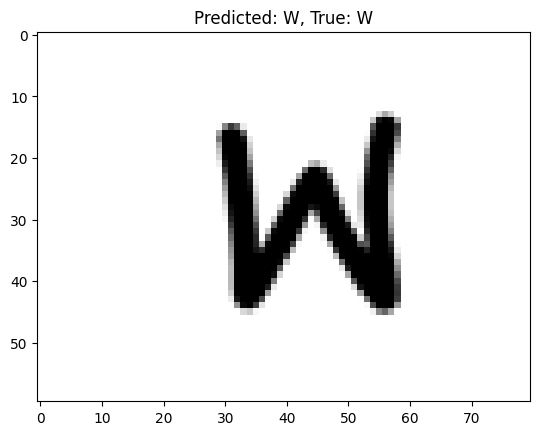

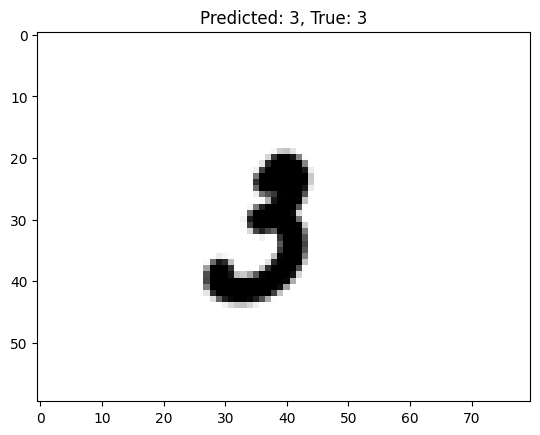

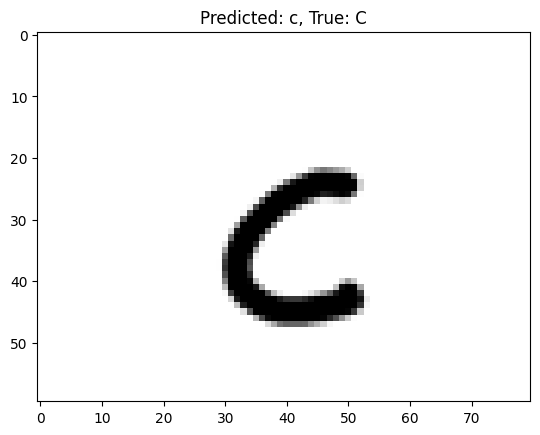

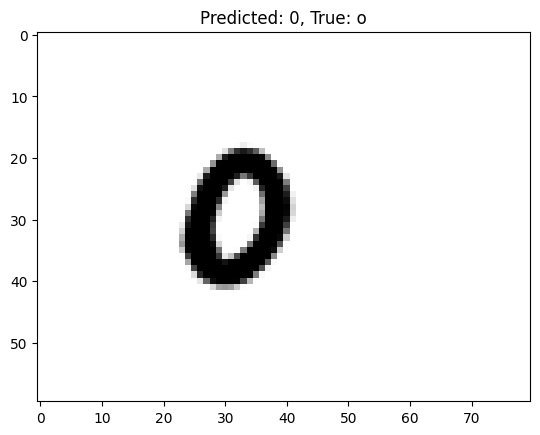

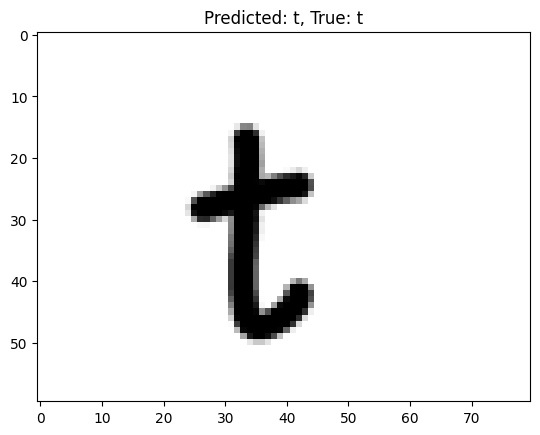

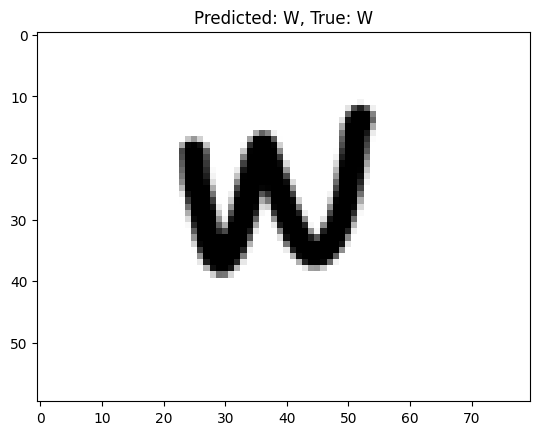

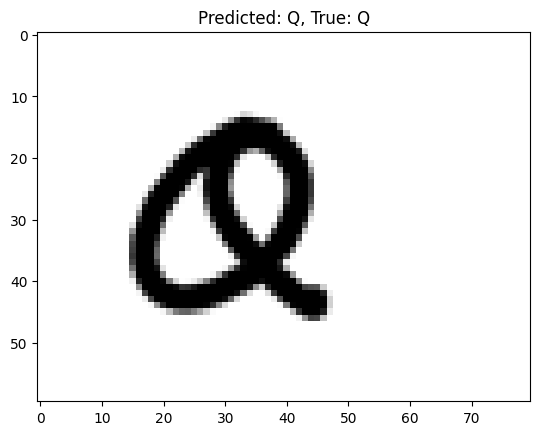

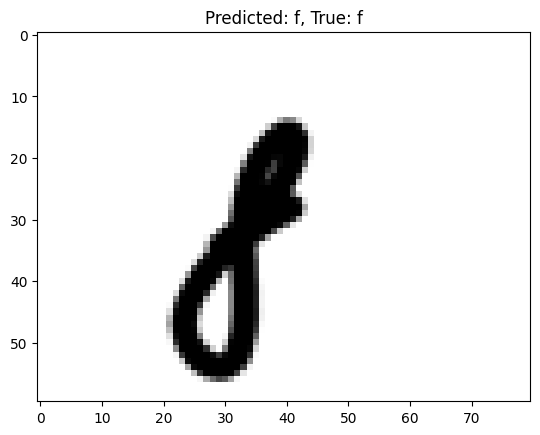

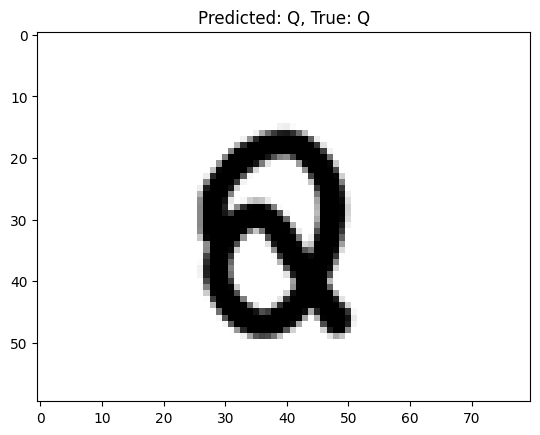

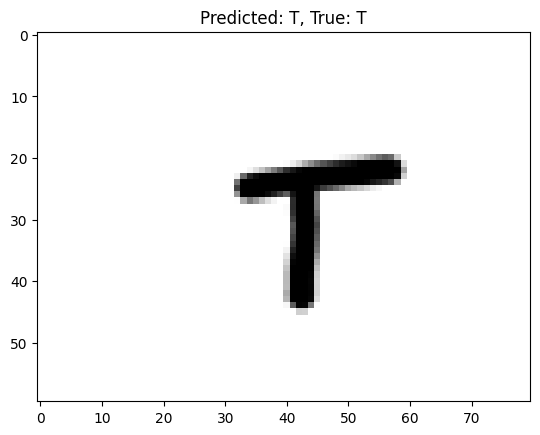

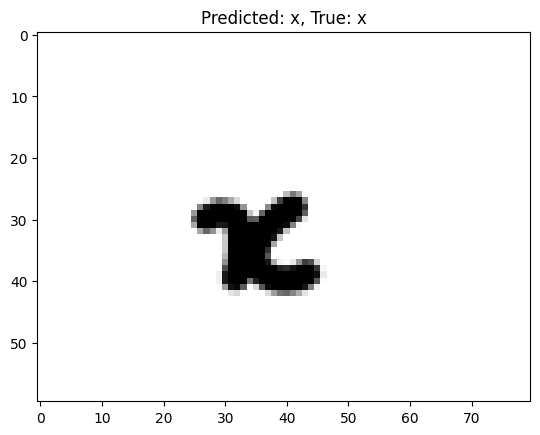

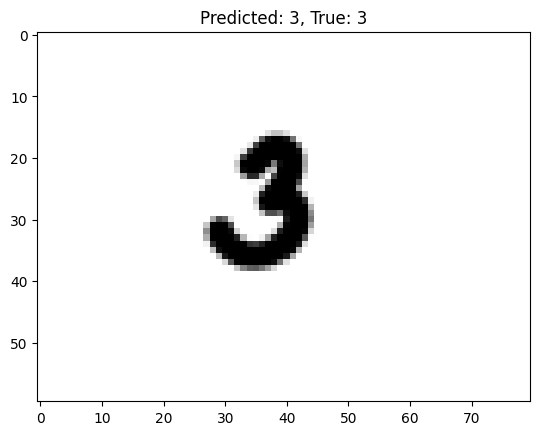

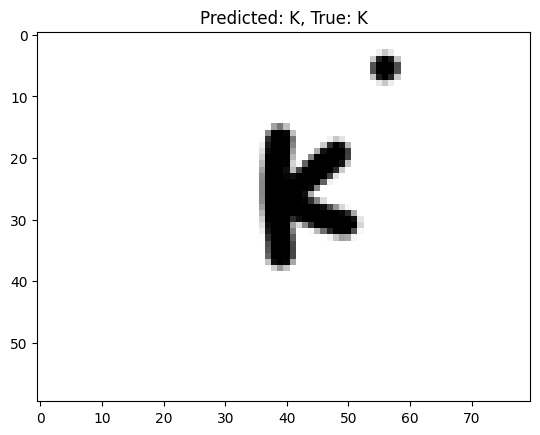

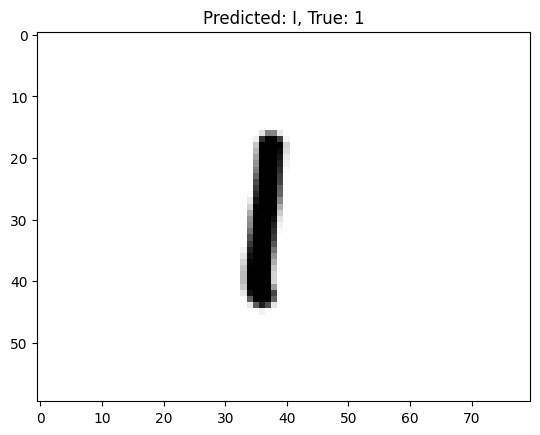

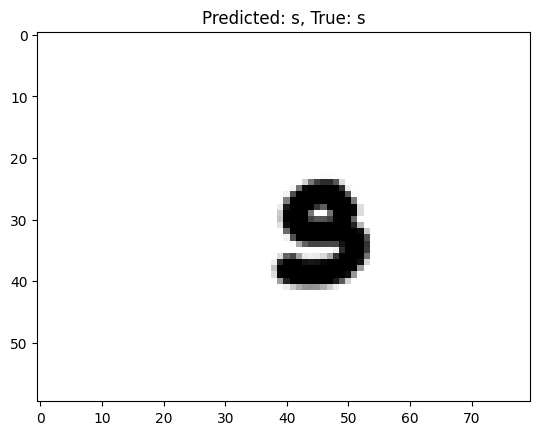

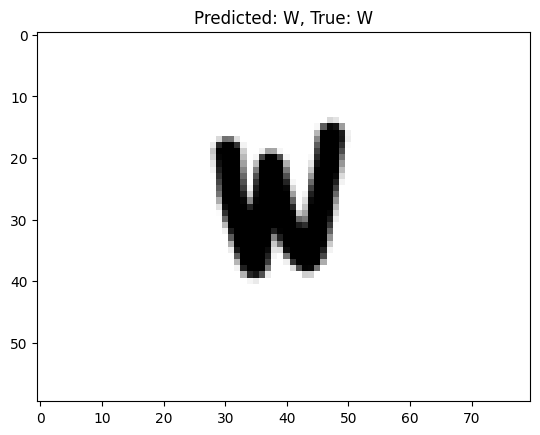

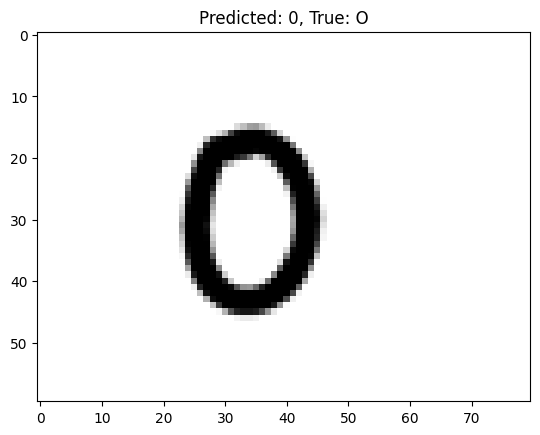

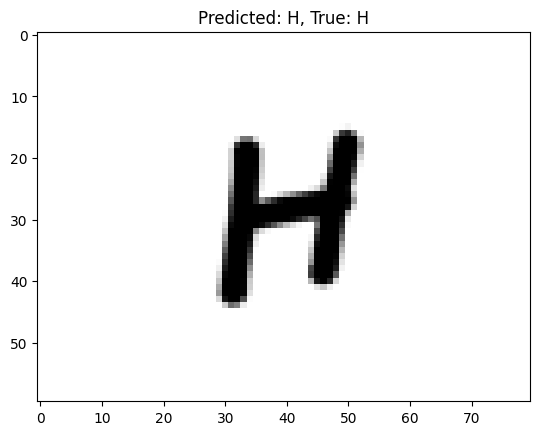

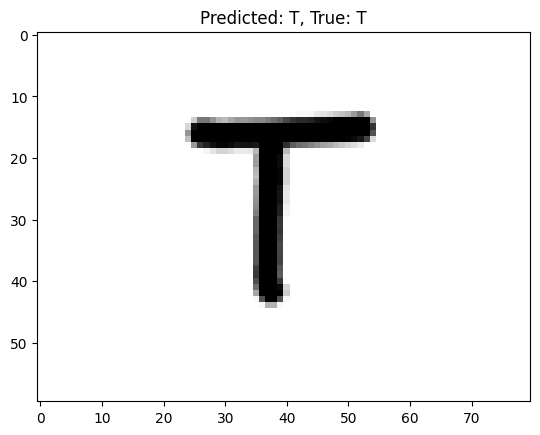

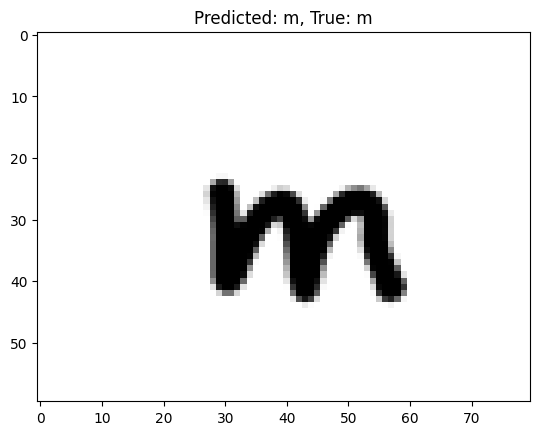

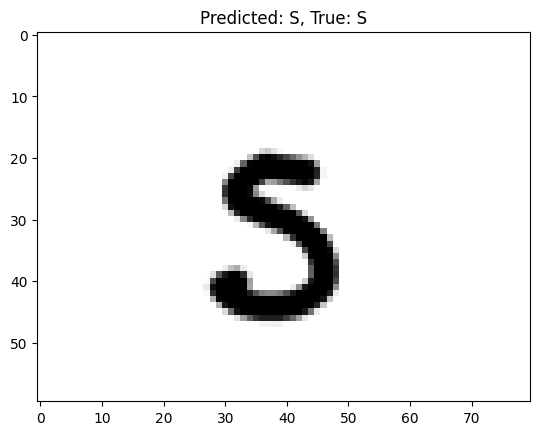

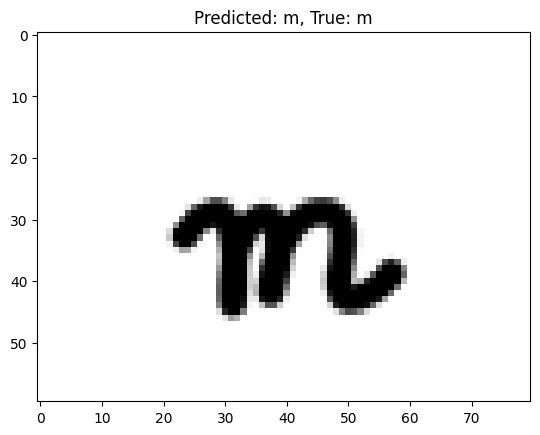

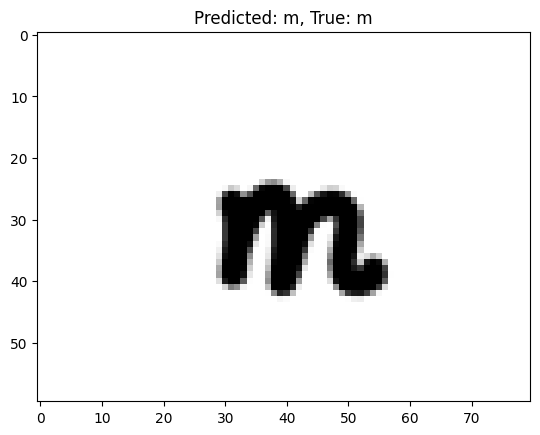

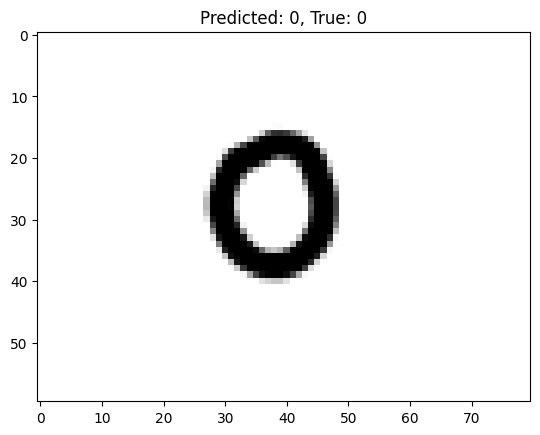

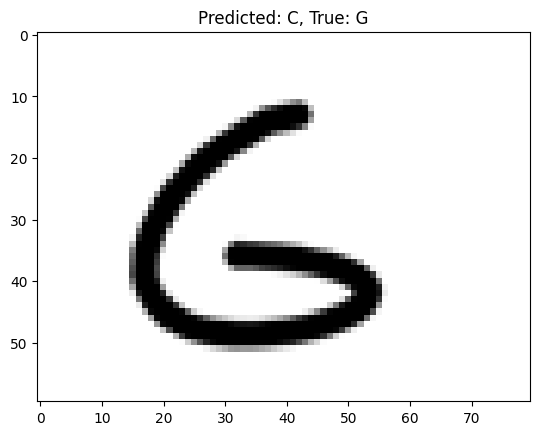

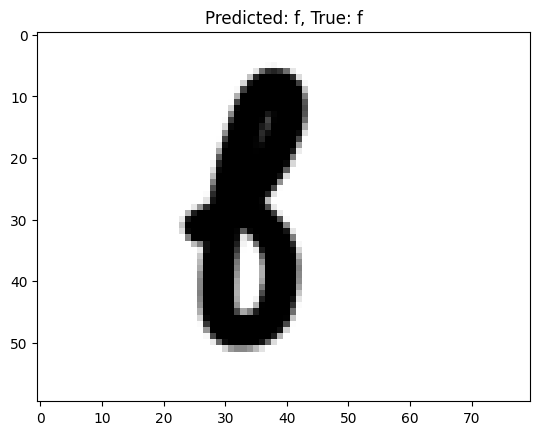

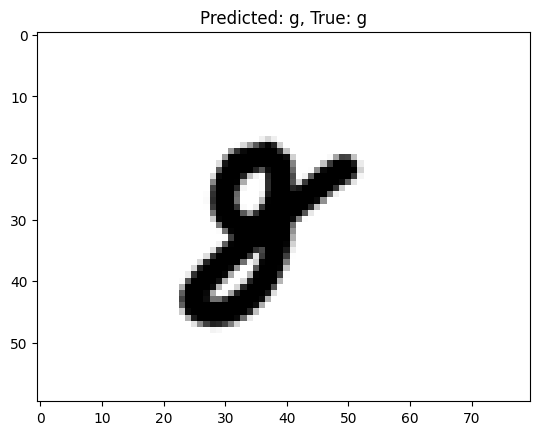

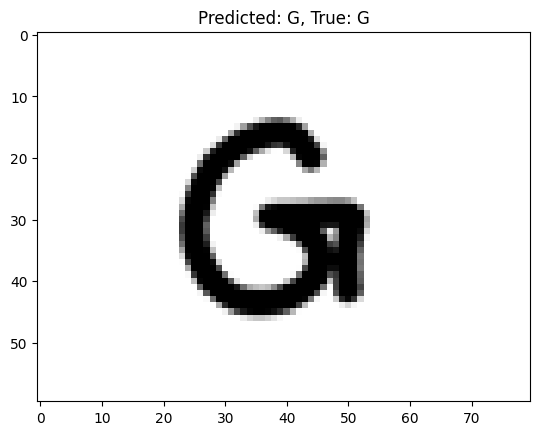

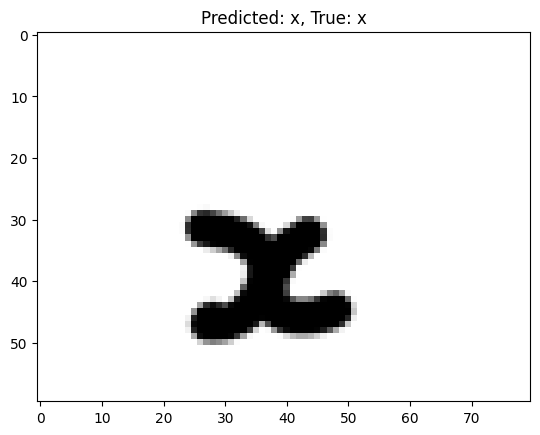

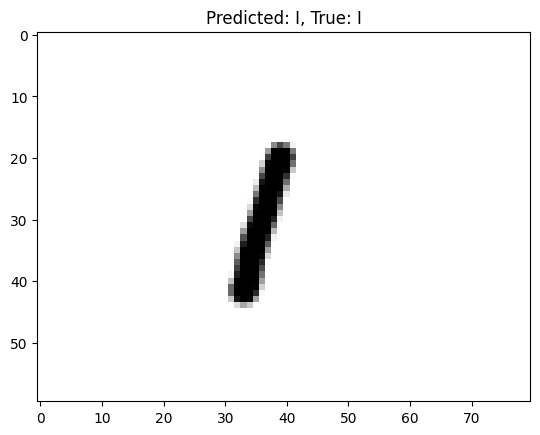

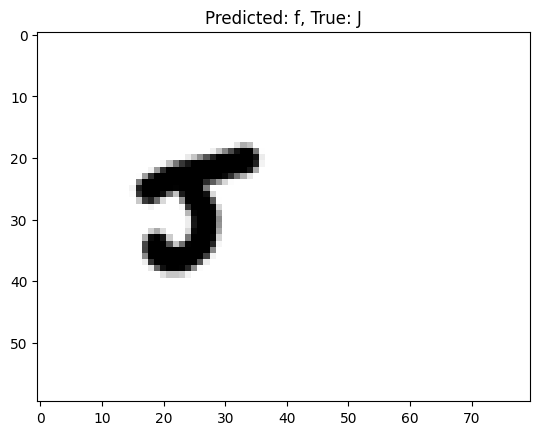

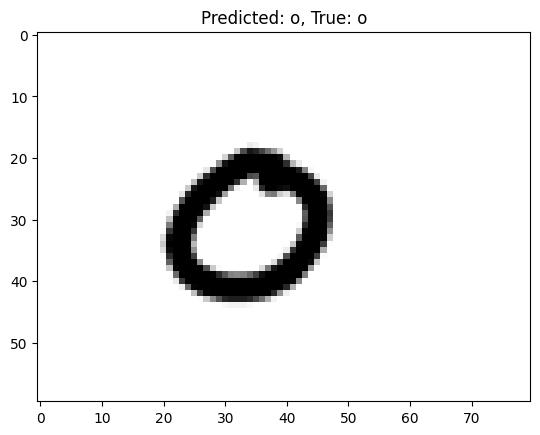

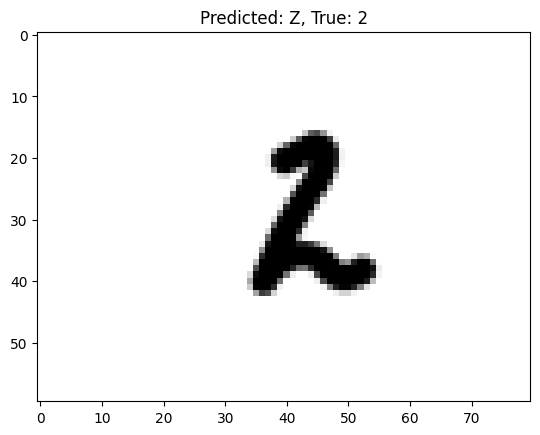

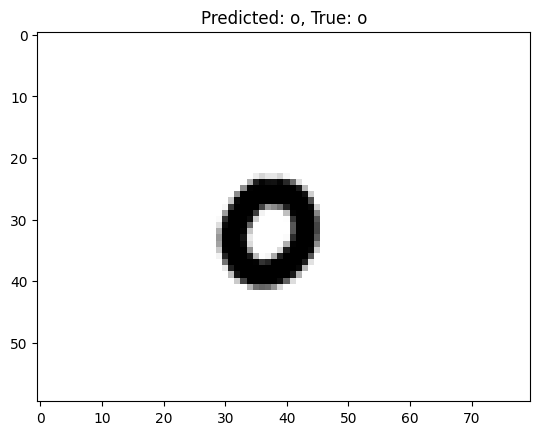

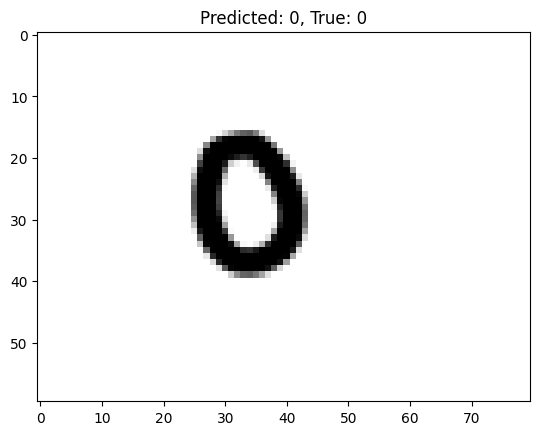

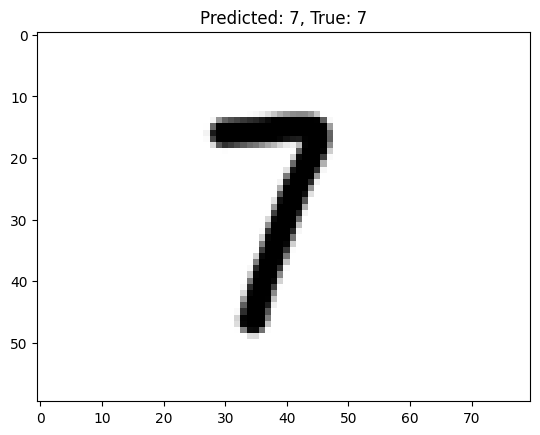

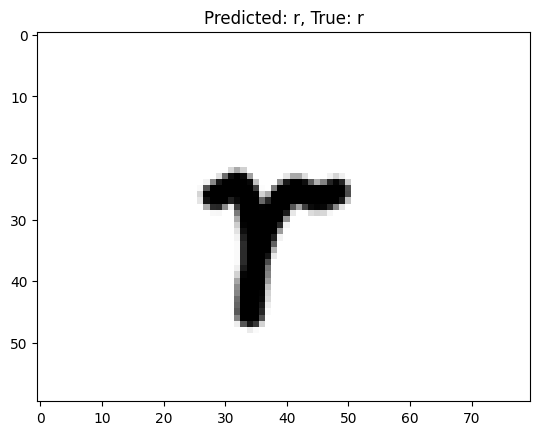

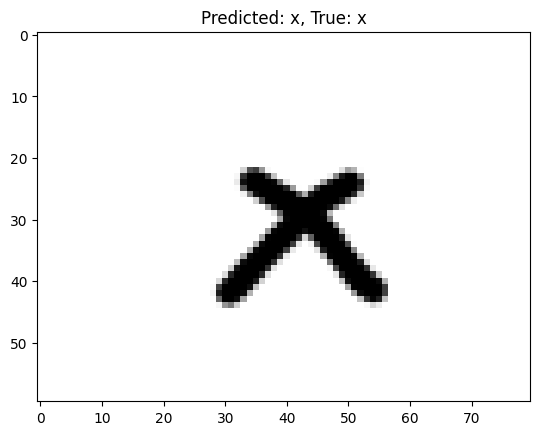

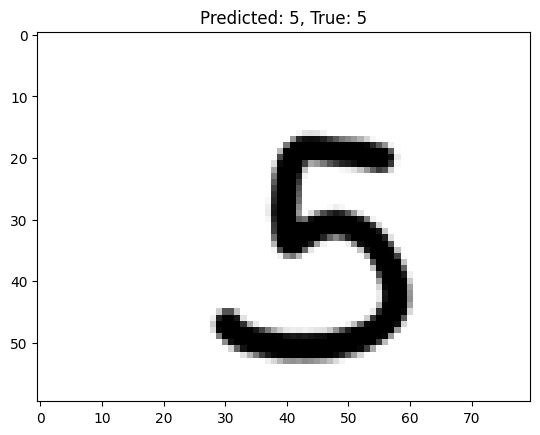

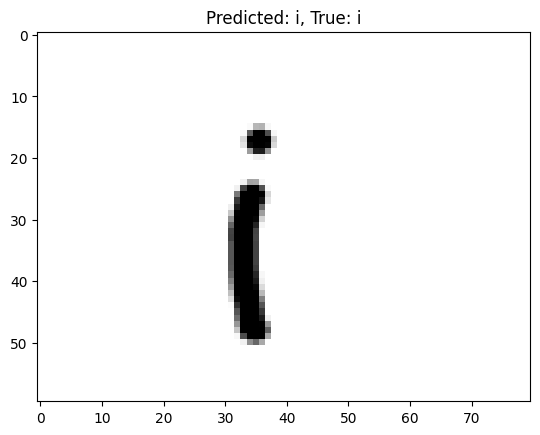

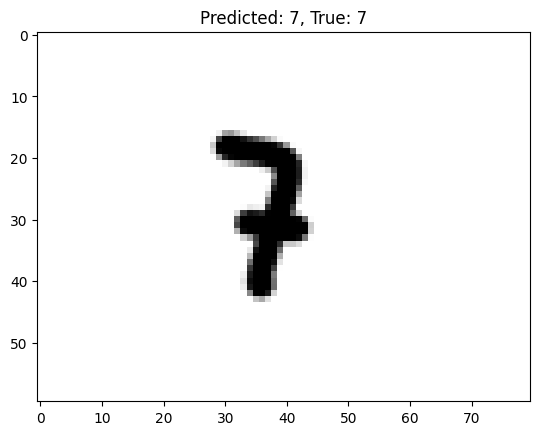

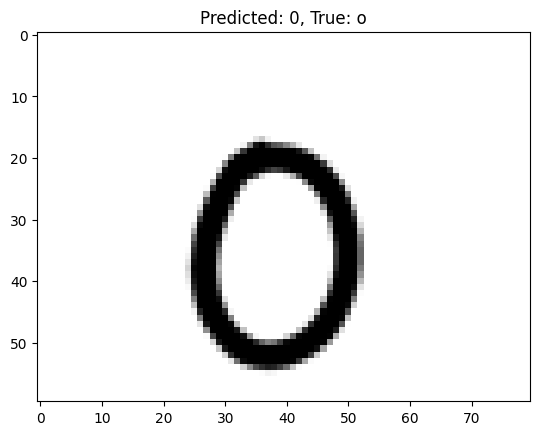

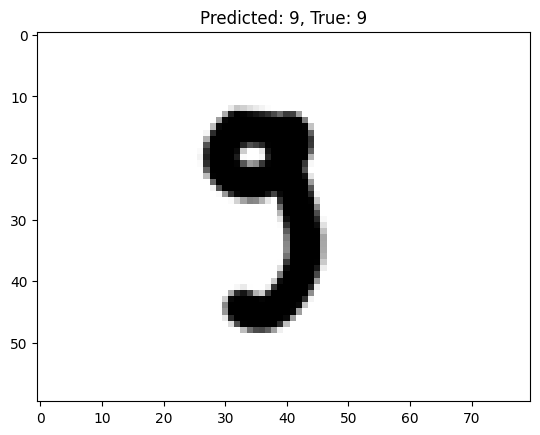

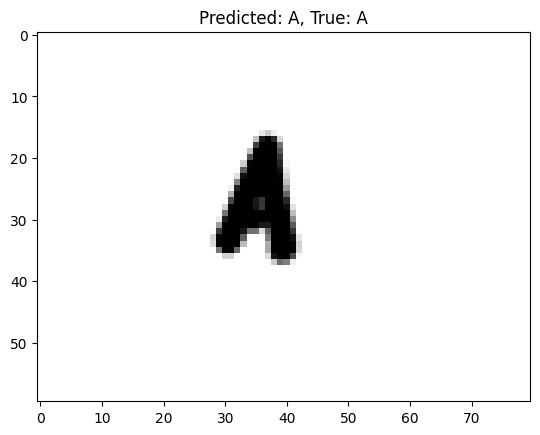

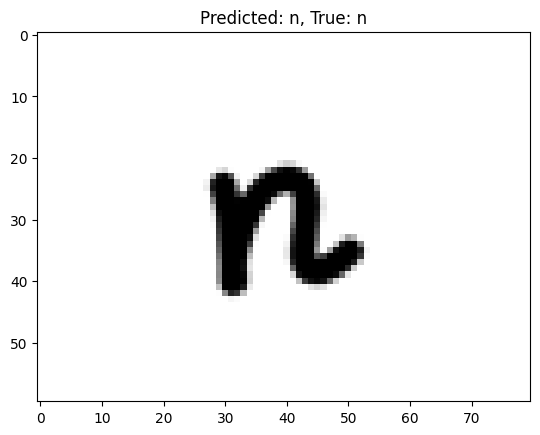

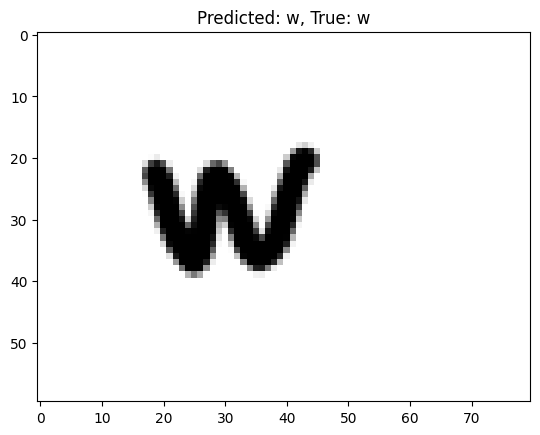

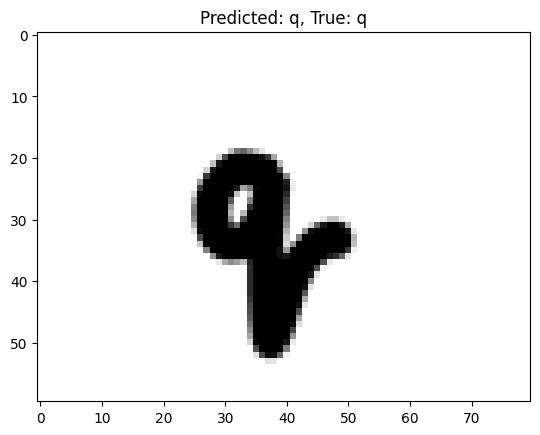

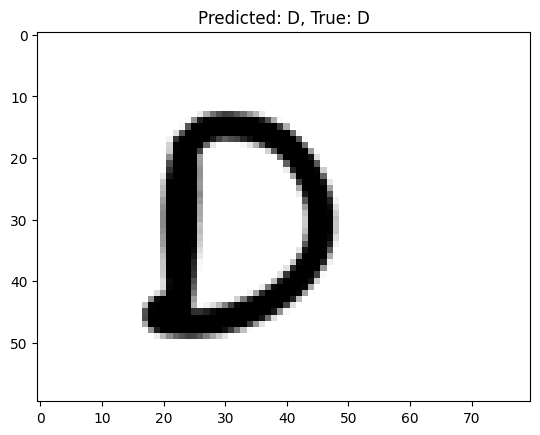

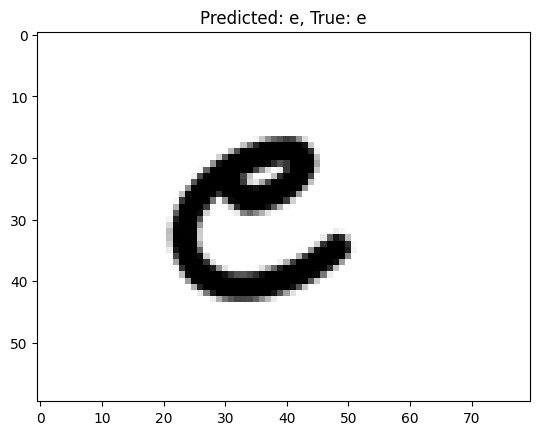

Best 3 Characters:
D: 1.00
H: 1.00
5: 0.95

Worst 3 Characters:
k: 0.58
l: 0.55
O: 0.31


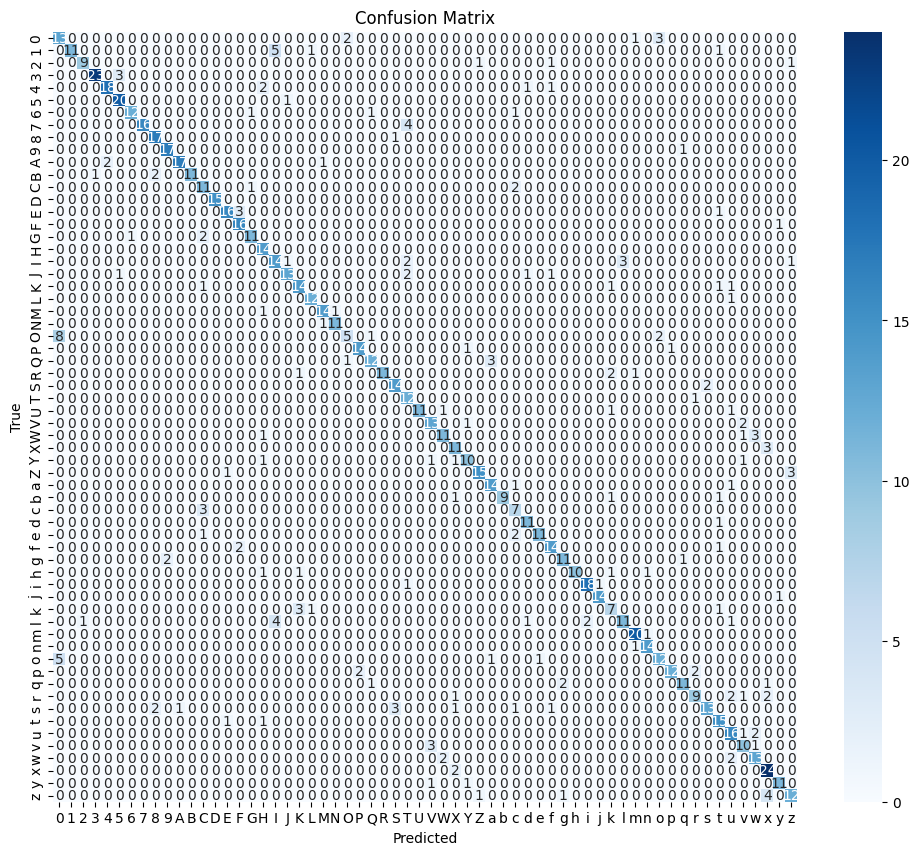

In [ ]:
# Show some example predictions
for i in range(50):
    plt.imshow(X_test[i].reshape(60, 80), cmap='gray')
    predicted_letter = label_to_letter_dict[y_pred_labels[i]] # Convert numerical label back to letter
    true_letter = label_to_letter_dict[y_test[i]]  # Convert numerical label back to letter
    plt.title(f"Predicted: {predicted_letter}, True: {true_letter}")
    plt.show()

# Show a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

unique_letters = list(label_to_letter_dict.values())

# Calculate accuracy for each character
cm = confusion_matrix(y_test_letters, y_pred_letters, labels=unique_letters)
accuracy_per_char = np.diag(cm) / np.sum(cm, axis=1)
char_accuracy_dict = dict(zip(unique_letters, accuracy_per_char))

# Sort characters by accuracy in descending order
sorted_char_accuracy = sorted(char_accuracy_dict.items(), key=lambda item: item[1], reverse=True)

# Get the best and worst 3 characters
best_3_chars = sorted_char_accuracy[:3]
worst_3_chars = sorted_char_accuracy[-3:]

# Print the results
print("Best 3 Characters:")
for char, accuracy in best_3_chars:
    print(f"{char}: {accuracy:.2f}")

print("\nWorst 3 Characters:")
for char, accuracy in worst_3_chars:
    print(f"{char}: {accuracy:.2f}")

# --- Heatmap ---
plt.figure(figsize=(12, 10))  # Adjust size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_letters, yticklabels=unique_letters)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')  # Add a title
plt.show()